In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/RunIIFall17NanoAODv7/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/587E2464-42CA-3A45-BD49-D23E49F658E6.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=100).events()

In [55]:
print([field for field in events.fields if 'LHE' in field])
print([field for field in events.fields if 'Gen' in field])
print([field for field in events.GenJet.fields])

['LHE', 'LHEPart', 'LHEPdfWeight', 'LHEReweightingWeight', 'LHEScaleWeight', 'LHEWeight']
['GenPart', 'GenJetAK8', 'Generator', 'GenDressedLepton', 'GenMET', 'GenJet', 'SubGenJetAK8', 'GenIsolatedPhoton', 'GenVisTau']
['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']


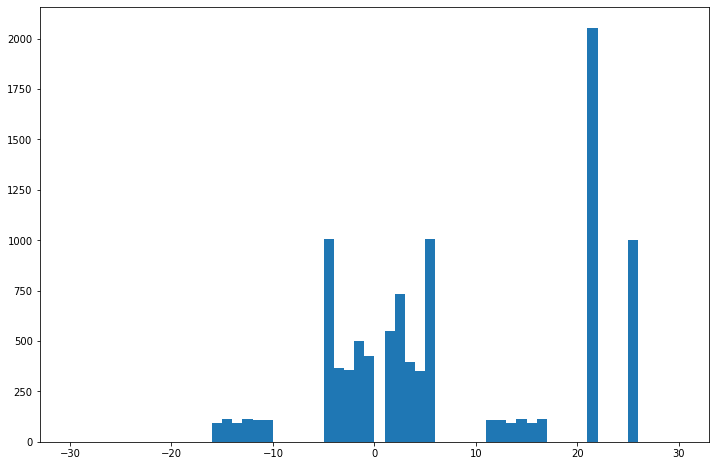

In [56]:
pdg = events.LHEPart.pdgId
plt.figure(figsize=[12,8])
plt.hist(ak.flatten(pdg), bins=np.arange(-30,31,1));

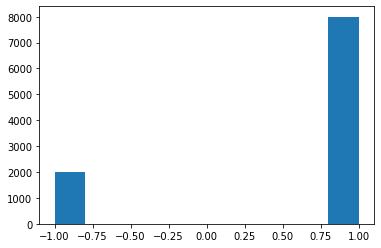

In [57]:
plt.hist(ak.flatten(events.LHEPart.status));

In [58]:
print("This is a dilepton event:")
for id in events[(ak.num(events.Electron.pt) + ak.num(events.Muon.pt)) == 2].LHEPart.pdgId[0]:
    print(id)

This is a dilepton event:
21
21
25
21
5
-5
-1
2
3
-4


In [7]:
print(events.Jet.genJetIdx[5])
print(events.GenJet[5].partonFlavour)

[1, 2, 0, -1, 3, 4, 5]
[5, -5, 21, 0, -5, 21]


In [3]:
isHiggs = (events.GenPart.pdgId == 25)
isHard = events.GenPart.hasFlags(['fromHardProcess'])
print(events.GenPart.childrenIdxG)
print(ak.num(events.GenPart.childrenIdxG, axis=2))
hasTwoChildren = ak.num(events.GenPart.childrenIdxG, axis=2) == 2
bFromH = events.GenPart[isHiggs & isHard & hasTwoChildren].children

[[[2, 3, 4, 5], [], [6], [11], [12], ... [7926], [7927, 7928], [], [], [], []]]
[[4, 0, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, ... 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0]]


In [104]:
ak.flatten?

In [103]:
bFromH.pt

<Array [[[98.5, 49.5]], ... [[63.6, 20.1]]] type='10000 * var * var * ?float32[p...'>

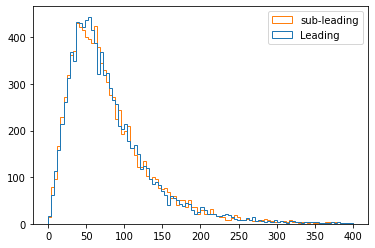

In [101]:
plt.hist( ak.flatten(bFromH.pt), label=["Leading","sub-leading"], histtype="step", bins=100, range=(0, 400))
plt.legend()

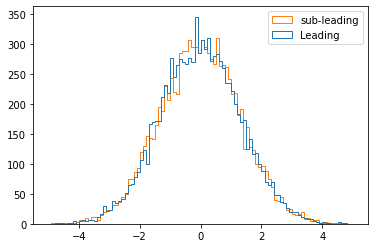

In [105]:
plt.hist( ak.flatten(bFromH.eta), label=["Leading","sub-leading"], histtype="step", bins=100, range=(-5, 5))
plt.legend()

In [85]:
bFromH[0]

<GenParticleArray [[GenParticle, GenParticle]] type='1 * var * ?genParticle'>

In [72]:
ak.num(bFromH)

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='1000 * int64'>

In [90]:
(bFromH[:,0, 0] + bFromH[:,0,1]).mass

<Array [125, 121, 125, 125, ... 125, 125, 125] type='1000 * ?float32'>

Text(0.5, 0, 'H mass')

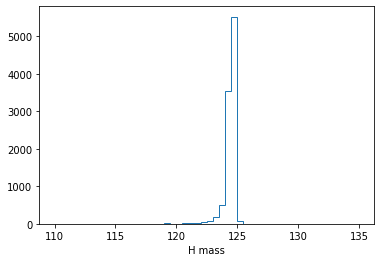

In [106]:
plt.hist( ak.flatten((bFromH[:,0,0] + bFromH[:,0,1]).mass, axis=-1), histtype="step", bins=50, range=(110, 135))
plt.xlabel("H mass")

In [7]:
deltaR0= bFromH[:,0,0].delta_r(events.Jet)
deltaR1 = bFromH[:,0,0].delta_r(events.Jet)
bjetH1 = ak.argmin(ak.mask(deltaR0, deltaR0<1), axis=-1)
bjetH2 =  ak.argmin(ak.mask(deltaR1, deltaR1<1), axis=-1)

In [8]:
bjetH1

<Array [1, None, 5, 5, None, ... 3, 6, 1, 2, 2] type='100 * ?int64'>

In [32]:
A = events.Jet[ [0,1,2,3,4], [0,4,1,0,4]]  

Non riesco a utilizzare il risultato di argmin per indicizzare i jet. 
Serve qualcosa tipo RDF::Take o numpy.take_along_axis...